In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.pipeline import Pipeline
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
data=pd.read_csv("diabetes.csv")
print(data.head())
Y=data['Outcome'].values
X=data.drop('Outcome',axis=1)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Counter({0: 500, 1: 268})


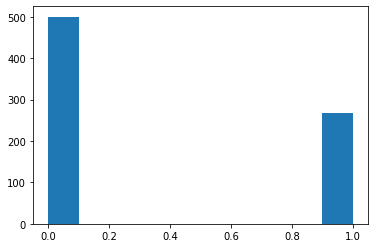

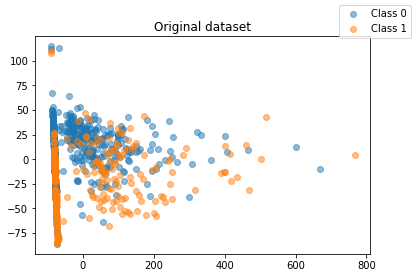

In [ ]:
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

#class distribution
counter = Counter(Y)
print(counter)

#visualization of data by histogram plot
plt.hist(Y)
plt.show()

#visualization of data by scatter plot
f, ax1 = plt.subplots(1)
c0 = ax1.scatter(X_vis[Y == 0, 0], X_vis[Y == 0, 1], label="Class 0", alpha=0.5)
c1 = ax1.scatter(X_vis[Y == 1, 0], X_vis[Y == 1, 1], label="Class 1", alpha=0.5)
ax1.set_title('Original dataset')
f.legend()
plt.show()

In [ ]:
model_ori=AdaBoostClassifier()
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['precision_macro','recall_macro']
scores_ori = cross_validate(model_ori, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)


In [ ]:
# summarize performance
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

Mean Precision: 0.7346
Mean Recall: 0.7122


Counter({1: 309, 0: 224})


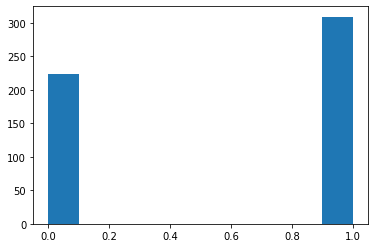

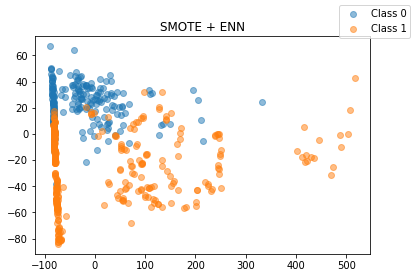

In [ ]:
#Using SMOTE-ENN to balance the data
#Define model
model=AdaBoostClassifier()
#Define SMOTE-ENN
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
#Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Evaluate model
scoring=['precision_macro','recall_macro']
scores = cross_validate(pipeline, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

X_resampled, y_resampled = resample.fit_resample(X, Y)
X_res_vis = pca.transform(X_resampled)

#class distribution
counter = Counter(y_resampled)
print(counter)
#visualization of data by histogram plot
plt.hist(y_resampled)
plt.show()

#visualization of data by scatter plot
f, ax2 = plt.subplots(1)
ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class 0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class 1", alpha=0.5)
ax2.set_title('SMOTE + ENN')

f.legend()
plt.show()

In [ ]:
# summarize performance
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Precision: 0.7269
Mean Recall: 0.7458
